## 线性分类器


In [22]:
import numpy as np

num_samples_per_class = 1000
# 1000 个二维随机点，协方差矩阵为 [[1, 0.5], [0.5, 1]]
# 对应一个从左下方到右上方的椭圆形点云
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

# 协方差矩阵相同，均值不同
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

# 将两个类别堆叠成一个形状为 (2000, 2) 的数组
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

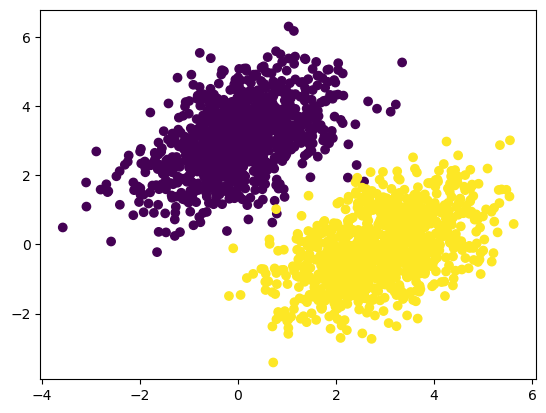

In [23]:
# 使用 Matplotlib 绘制数据图像

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

创建线性分类器，学习划分这两个类别。

**(prediction = W ・ input + b)**

In [24]:
import tensorflow as tf

# 输入是二维点
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [25]:
# 前向传播函数
def model(inputs):
    return tf.matmul(inputs, W) + b

# 均方误差损失函数
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 训练步骤函数
learning_rate = 0.1

def training_step(inputs, targets):
    # 在一个梯度带作用域内进行一次前向传播
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # 更新权重
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Loss at step 0:  1.6912
Loss at step 1:  0.2371
Loss at step 2:  0.1230
Loss at step 3:  0.1046
Loss at step 4:  0.0967
Loss at step 5:  0.0903
Loss at step 6:  0.0846
Loss at step 7:  0.0794
Loss at step 8:  0.0746
Loss at step 9:  0.0703
Loss at step 10:  0.0664
Loss at step 11:  0.0628
Loss at step 12:  0.0595
Loss at step 13:  0.0565
Loss at step 14:  0.0537
Loss at step 15:  0.0513
Loss at step 16:  0.0490
Loss at step 17:  0.0469
Loss at step 18:  0.0450
Loss at step 19:  0.0433
Loss at step 20:  0.0417
Loss at step 21:  0.0403
Loss at step 22:  0.0390
Loss at step 23:  0.0378
Loss at step 24:  0.0367
Loss at step 25:  0.0357
Loss at step 26:  0.0348
Loss at step 27:  0.0339
Loss at step 28:  0.0332
Loss at step 29:  0.0325
Loss at step 30:  0.0319
Loss at step 31:  0.0313
Loss at step 32:  0.0308
Loss at step 33:  0.0303
Loss at step 34:  0.0298
Loss at step 35:  0.0294
Loss at step 36:  0.0291
Loss at step 37:  0.0288
Loss at step 38:  0.0285
Loss at step 39:  0.0282


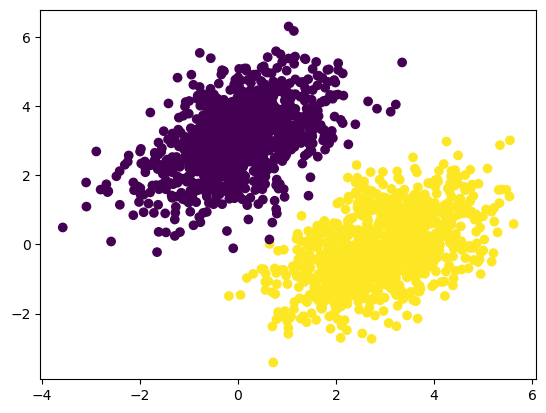

In [26]:
# 批量训练循环

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss: .4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

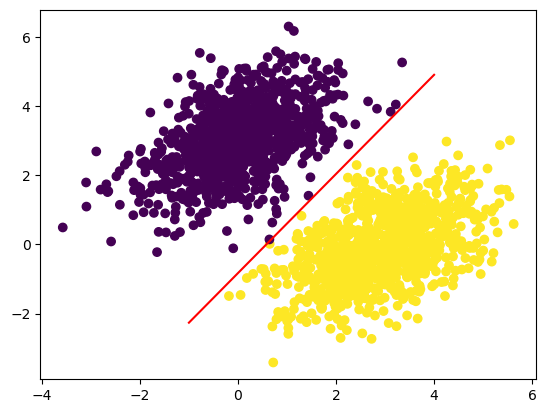

In [27]:
# 绘制直线

x = np.linspace(-1, 4, 100) # 在 -1 和 4 之间生成 100 个等距数字
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # 直线方程
plt.plot(x, y, "-r") # 绘制直线，-r 表示红色
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # 同时绘制模型预测结果